<a href="https://colab.research.google.com/github/IU-team-88/CS114.L21.KHCL/blob/main/RECOGNIZING%20HAND-WRITTEN%20DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lê Trường Thịnh 18521438 

Dương Minh Tâm  18521367

Nguyễn Duy Thanh 18521408

Nguyễn Duy Thịnh 18521443

Trần Nguyễn Minh Triết 18521534

Recognizing hand-written digits:

In [40]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


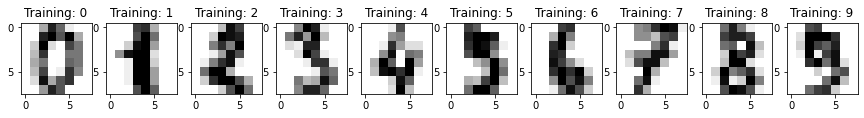

In [41]:

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):

    ax.set_title('Training: %i' % label)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation= 'nearest')
    

In [42]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

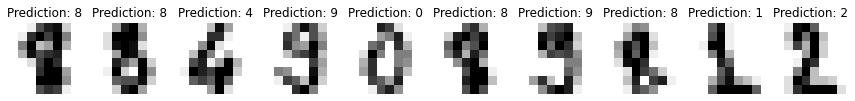

In [43]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

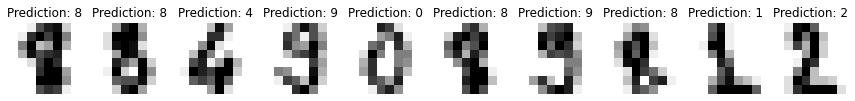

In [44]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [45]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


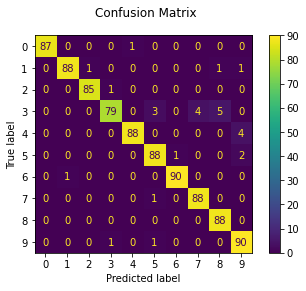

In [46]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

<IPython.core.display.Javascript object>

Saved to photo.jpg


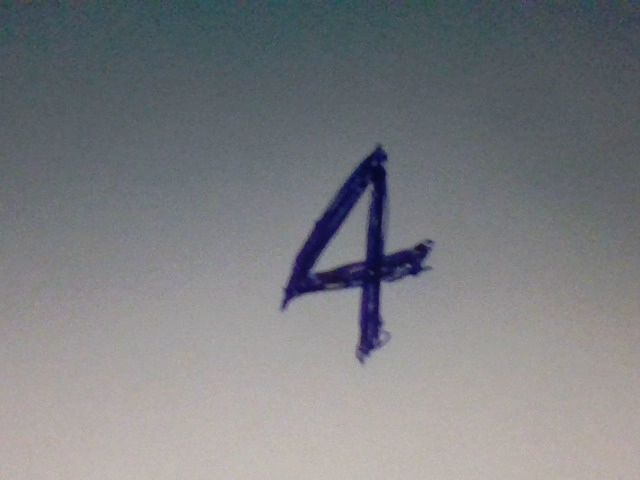

In [60]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

I1:  [[ 72  71  69 ...  69  69  69]
 [ 71  70  68 ...  66  65  65]
 [ 70  69  68 ...  67  66  64]
 ...
 [174 174 178 ... 178 176 174]
 [173 177 179 ... 176 175 174]
 [173 179 179 ... 174 174 173]]


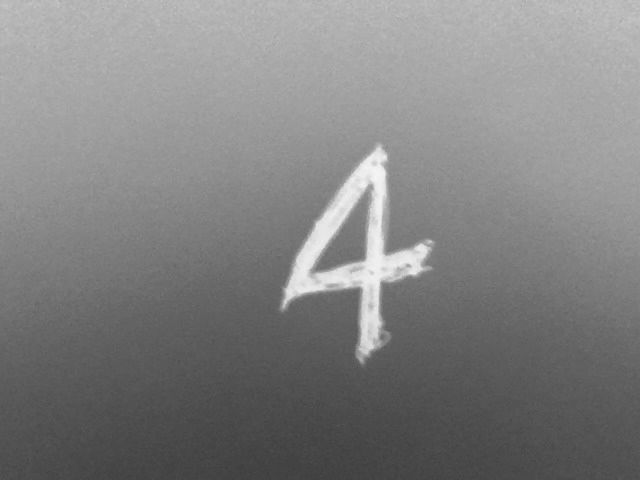

I2:  [[183 184 186 ... 186 186 186]
 [184 185 187 ... 189 190 190]
 [185 186 187 ... 188 189 191]
 ...
 [ 81  81  77 ...  77  79  81]
 [ 82  78  76 ...  79  80  81]
 [ 82  76  76 ...  81  81  82]]
shape0:  480
shape1:  640
29930


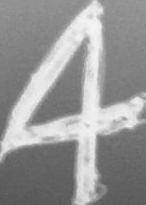

img_resize_size:  64


In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
#đọc hình từ webcam
img_temp = cv2.imread("/content/photo.jpg", 0)
print('I1: ', img_temp)
i = 0
j = 0

#tạm xem ảnh chữ đen xanh nền trắng là ảnh chữ đen nền trắng và biến nó về ảnh chữ trắng nên đen
while i < img_temp.shape[0]:
  while j < img_temp.shape[1]:
    img_temp[i][j] = 255 - img_temp[i][j]
    j = j + 1
  j = 0
  i = i + 1
cv2_imshow(img_temp)
print('I2: ', img_temp)
print('shape0: ', img_temp.shape[0])
print('shape1: ', img_temp.shape[1])


top = img_temp.shape[0]//2
bot = img_temp.shape[0]//2
blue = img_temp.shape[1]//2
red = img_temp.shape[1]//2
# rút ảnh về phạm vi chỉ có chữ số
i = 0
j = 0
while i < img_temp.shape[0]:
  while j < img_temp.shape[1]:
    if img_temp[i][j] > 200:
      if top >= i: top = i
      if bot <= i: bot = i
      if blue >= j: blue = j
      if red <= j: red = j
    j = j + 1
  j = 0
  i = i + 1
img_temp2 = img_temp[top:bot, blue:red] 
print(img_temp2.size)
cv2_imshow(img_temp2)
#resize
img_rs = cv2.resize(img_temp2,(8,8))
print('img_resize_size: ', img_rs.size)

cv2_imshow(img_rs)

Text(0.5, 1.0, 'Prediction: [4]')

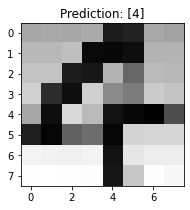

In [62]:
#nếu để ảnh resize bình thường model sẽ có tỉ lệ sai rất cao, tụi em có tham khảo các bài thì thấy các bạn chia cho 16, còn em thì chia cho tới khi nào ông bà tổ tiên bảo oke thì em dừng lại
img_out =img_rs/20
predicted = clf.predict(img_out.reshape(1,64))
_, ax = plt.subplots(figsize=(4, 3))
ax.imshow(img_rs, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predicted}')

<IPython.core.display.Javascript object>

Saved to photo.jpg


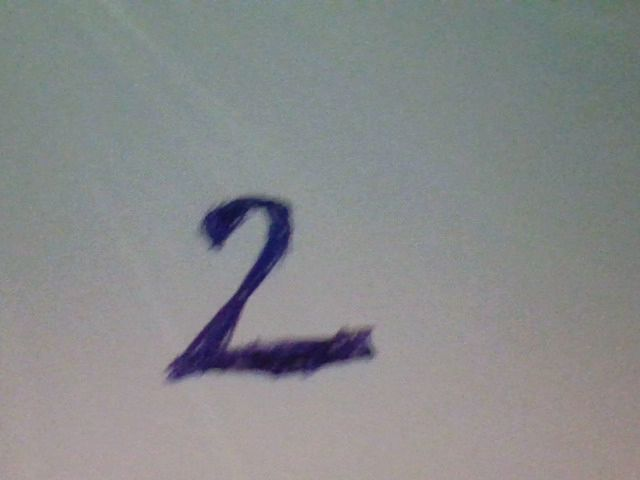

In [78]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

I1:  [[125 127 128 ... 106 105 105]
 [126 128 129 ... 105 105 105]
 [127 128 129 ... 104 104 105]
 ...
 [153 152 154 ... 138 137 140]
 [157 155 155 ... 139 138 141]
 [160 156 153 ... 141 140 143]]


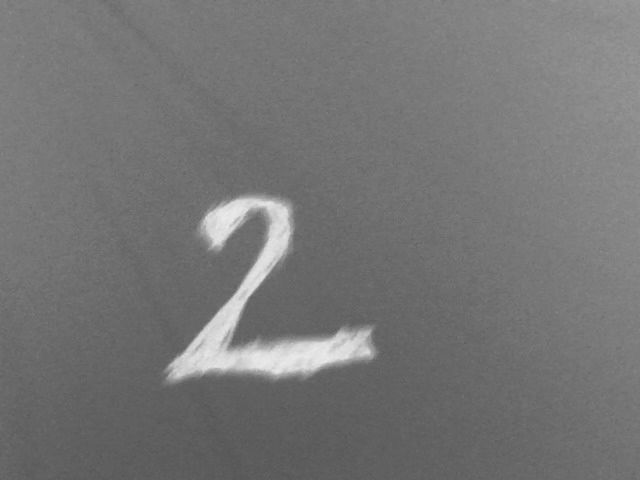

I2:  [[130 128 127 ... 149 150 150]
 [129 127 126 ... 150 150 150]
 [128 127 126 ... 151 151 150]
 ...
 [102 103 101 ... 117 118 115]
 [ 98 100 100 ... 116 117 114]
 [ 95  99 102 ... 114 115 112]]
shape0:  480
shape1:  640
34320


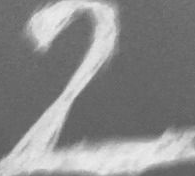

img_resize_size:  64


In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

img_temp = cv2.imread("/content/photo.jpg", 0)
print('I1: ', img_temp)
i = 0
j = 0
while i < img_temp.shape[0]:
  while j < img_temp.shape[1]:
    img_temp[i][j] = 255 - img_temp[i][j]
    j = j + 1
  j = 0
  i = i + 1
cv2_imshow(img_temp)
print('I2: ', img_temp)
print('shape0: ', img_temp.shape[0])
print('shape1: ', img_temp.shape[1])


top = img_temp.shape[0]//2
bot = img_temp.shape[0]//2
blue = img_temp.shape[1]//2
red = img_temp.shape[1]//2

i = 0
j = 0
while i < img_temp.shape[0]:
  while j < img_temp.shape[1]:
    if img_temp[i][j] > 200:
      if top >= i: top = i
      if bot <= i: bot = i
      if blue >= j: blue = j
      if red <= j: red = j
    j = j + 1
  j = 0
  i = i + 1
img_temp2 = img_temp[top:bot, blue:red] 
print(img_temp2.size)
cv2_imshow(img_temp2)
img_rs = cv2.resize(img_temp2,(8,8))
print('img_resize_size: ', img_rs.size)

cv2_imshow(img_rs)

Text(0.5, 1.0, 'Prediction: [2]')

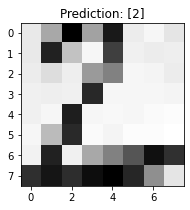

In [80]:
img_out =img_rs/16
predicted = clf.predict(img_out.reshape(1,64))
_, ax = plt.subplots(figsize=(4, 3))
ax.imshow(img_rs, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predicted}')

Trả lời câu hỏi:

**Kết quả của webcam và giấy viết tay không tốt

Dựa vào : dữ liệu train là chữ số trắng trên nền đen, mà chúng ta thường viết chữ xanh ( bút bi) trên nền giấy trắng, vậy nên phải xử lí màu trước khi làm testcase

Thứ 2 dựa vào những lần test tụi em kết luận rằng hình ảnh vào phải gần khớp với hình ảnh của dataset thì mới có tỉ lệ nhận biết chính xác cao hơn, còn nếu ko tỉ lệ đúng là rất thấp

Thứ 3 model không nhận biết được nếu chữ số bị lệch, bị méo, do bộ dataset chưa có những trường hợp này

Bài này mà nhận biết số nhà thì là 1 thảm họa, đặc biệt đối với Việt Nam khi mỗi ngồi nhà thích thì để một phông chữ khác nhau, model chắc chắn sẽ gặp rất nhiều khó khăn trong việc nhận dạng